# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [22]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#load and inspect the data
data=pd.read_csv('reg_data.csv',header=None)
data

#x_mean,y_mean

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


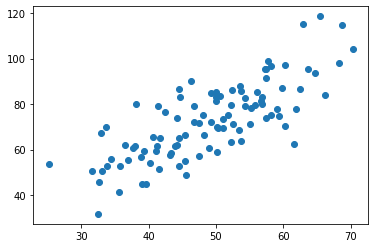

In [24]:
#plot the data
plt.scatter(x,y)

Write your inital observations below:



In [62]:
#implement a least squares function to find a, b
def covar(x,x_mean,y,y_mean):
    res=0
    for i in range(len(x)): 
        res+=(x[i]-x_mean)*(y[i]-y_mean)
    return res
def var(x):
    res2=0
    for i in range(len(x)):
        res2+=(x[i]-np.mean(x))**2
    return res2    
def coeff(data):
    x=np.array(data[0])
    y=np.array(data[1])
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    b=covar(x,x_mean,y,y_mean)/var(x)
    a=y_mean-(b*x_mean)
    return [a,b]
coeff(data)        


[7.991020982270385, 1.32243102275536]

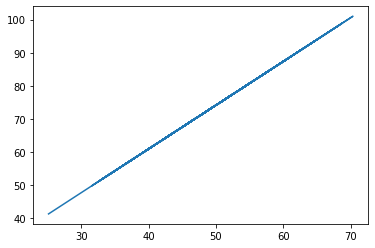

In [49]:
#plot the regression line as x and y
a=coeff(data)[0]
b=coeff(data)[1]
plt.plot(x,a+b*x)

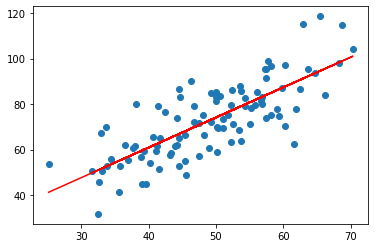

In [52]:
#plot the original data with the regression line as defined by your function
plt.scatter(x,y)
plt.plot(x,a+x*b,color='#ff0000')

Write your final observations below:



In [59]:
mse=sum([(y[i]-(a+b*x[i]))**2 for i in range(len(x))])
rmse=np.sqrt(mse)
rmse
score=1-(mse/var(y))
score

0.5986557915386621

In [67]:
class logistic():
    def __init__(self,data):
        self.data=data
    def covar(self,x,x_mean,y,y_mean):
        res=0
        for i in range(len(x)): 
            res+=(x[i]-x_mean)*(y[i]-y_mean)
        return res
    def var(self,x):
        res2=0
        for i in range(len(x)):
            res2+=(x[i]-np.mean(x))**2
        return res2    
    def coeff(self):
        x=np.array(data[0])
        y=np.array(data[1])
        x_mean=np.mean(x)
        y_mean=np.mean(y)
        b=covar(x,x_mean,y,y_mean)/var(x)
        a=y_mean-(b*x_mean)
        return [a,b]
    def score(self):
        mse=sum([(y[i]-(a+b*x[i]))**2 for i in range(len(x))])
        rmse=np.sqrt(mse)
        score=1-(mse/var(y))
        return score
log=logistic(data)

print(f"The coeffients are a={log.coeff()[0]},b={log.coeff()[1]}")
print(f"The prediction score is {log.score()}")



The coeffients are a=7.991020982270385,b=1.32243102275536
The prediction score is 0.5986557915386621
